In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import librosa
import librosa.display

from tensorflow.keras import layers, models
import tensorflow as tf

In [2]:
def wav_to_spectrogram(file_path, output_shape=(128, 64)):
    # Load the WAV file
    y, sr = librosa.load(file_path, sr=8000, dtype=np.float32)
    # print(sr)

    # Generate the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    
    # Resize the spectrogram so that it can be fed into the model
    spectrogram = librosa.util.fix_length(spectrogram, size=output_shape[1], mode='constant', constant_values=0)
    
    # Normalize the spectrogram to values between 0 and 1, this really helps improve model accuracy
    spectrogram = librosa.util.normalize(spectrogram)

    return spectrogram, sr, y

# Example usage:
spectrogram, sr, y = wav_to_spectrogram('donateacry_corpus_cleaned_and_updated_data/belly_pain/69BDA5D6-0276-4462-9BF7-951799563728-1436936185-1.1-m-26-bp.wav')

In [3]:
spectrogram

array([[2.7152826e-03, 1.4951623e-04, 1.2883396e-05, ..., 4.8656584e-05,
        9.8821511e-06, 6.5155191e-06],
       [3.8231420e-03, 2.7480035e-04, 1.8618830e-05, ..., 1.7635466e-05,
        4.9318392e-06, 7.6169854e-06],
       [3.0831664e-03, 3.0914109e-04, 5.6617562e-05, ..., 9.9263252e-06,
        3.0484032e-06, 8.1206481e-06],
       ...,
       [1.1277095e-03, 8.1903557e-04, 2.1212362e-04, ..., 6.8047528e-05,
        7.4643511e-05, 3.1854517e-05],
       [1.3975959e-03, 1.3230210e-03, 2.5881789e-04, ..., 8.2261204e-06,
        2.5831448e-06, 5.2356754e-06],
       [9.3954871e-04, 3.3643784e-04, 9.9347097e-05, ..., 9.0213616e-06,
        2.7974688e-06, 2.4159101e-05]], dtype=float32)

In [4]:
D = librosa.stft(y)  #  short-time Fourier transform of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

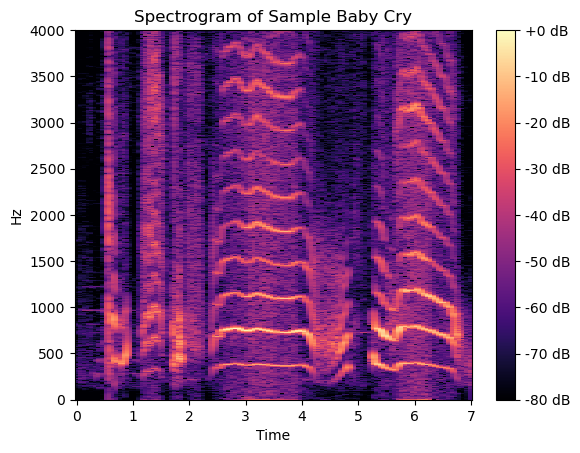

In [5]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax, sr=sr)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram of Sample Baby Cry');

In [6]:
# Define the folder containing the subfolders with WAV files
data_folder = 'donateacry_corpus_cleaned_and_updated_data'

# Define the labels (subfolder names)
labels = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']

# Initialize empty lists to store spectrograms and labels
X = []
y = []

# Iterate through the labels
for label_idx, label in enumerate(labels):
    label_folder = os.path.join(data_folder, label)

    # Iterate through WAV files in the label folder
    for wav_file in os.listdir(label_folder):
        if wav_file.endswith('.wav'):
            wav_file_path = os.path.join(label_folder, wav_file)

            # Convert WAV to spectrogram using the wav_to_spectrogram function
            spectrogram, sr, au = wav_to_spectrogram(wav_file_path)

            # Append the spectrogram to X_train
            X.append(spectrogram)

            # Append the label index (numeric representation of the label) to y_train
            y.append(label_idx)

# Convert lists to NumPy arrays for further processing
X = np.array(X)
y = np.array(y)

# Check the shapes
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (457, 128, 64)
y shape: (457,)


In [7]:
# Examine labels, we see that almost all are 3, hungry
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=215)

In [9]:
# Create the model
num_classes = len(np.unique(y_train))

model = models.Sequential([
    layers.Input(shape=(128, 64)),  # Adjust the input shape based on your spectrogram size
    layers.Reshape(target_shape=(128, 64, 1)),  # Add a channel dimension
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Convert labels to one-hot encoding (assuming you have more than one class)
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes)

# Train the model
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/10
11/11 [==============================] - 1s 41ms/step - loss: 0.9669 - accuracy: 0.7744 - val_loss: 0.7991 - val_accuracy: 0.7838
Epoch 2/10
11/11 [==============================] - 0s 32ms/step - loss: 0.4518 - accuracy: 0.8506 - val_loss: 0.8976 - val_accuracy: 0.7838
Epoch 3/10
11/11 [==============================] - 0s 33ms/step - loss: 0.2262 - accuracy: 0.9116 - val_loss: 0.9223 - val_accuracy: 0.7838
Epoch 4/10
11/11 [==============================] - 0s 32ms/step - loss: 0.1134 - accuracy: 0.9726 - val_loss: 1.0741 - val_accuracy: 0.7838
Epoch 5/10
11/11 [==============================] - 0s 32ms/step - loss: 0.0499 - accuracy: 0.9970 - val_loss: 1.2061 - val_accuracy: 0.7838
Epoch 6/10
11/11 [==============================] - 0s 33ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 1.2864 - val_accuracy: 0.7838
Epoch 7/10
11/11 [==============================] - 0s 37ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 1.4750 - val_accuracy: 0.7838
Epoch 8/10
11

In [11]:
# Let's try just guessing hungry all the time
hungry_test = np.full(len(y_pred_classes), 3)

In [12]:
# Yay we are like 0.3% better...
accuracy_score(y_test_classes, hungry_test)

0.8369565217391305

In [13]:
## Try to use CLAP model?
## https://huggingface.co/learn/audio-course/chapter4/classification_models
## pip install git+https://github.com/huggingface/transformers

from transformers import pipeline

# classifier = pipeline(
#     "audio-classification",
#     model="anton-l/xtreme_s_xlsr_300m_minds14",
# )

candidate_labels = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']

classifier = pipeline(
    task="zero-shot-audio-classification", model="laion/clap-htsat-unfused"
)

/Users/jgochioco/micromamba/envs/cs109a/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
classifier(spectrogram, candidate_labels=candidate_labels)

ValueError: We expect a single channel audio input for ZeroShotAudioClassificationPipeline

In [15]:
spectrogram.shape

(128, 64)

In [16]:
from datasets import load_dataset

dataset = load_dataset("ashraq/esc50")
# For some reason this doesn't work even though it was their example
#    >>> audio = next(iter(dataset["train"]["audio"]))["array"]

Repo card metadata block was not found. Setting CardData to empty.

Generating train split: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:04<00:00, 402.87 examples/s]
